In [ ]:
!pip install pandas_ta

     |████████████████████████████████| 115 kB 5.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=9d81dab26c4ca37e7fed6f32b5edfae6098f9ee2a56fe2f53b58e872204e87f1
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
# Importamos las librerias
import numpy as np
import pandas as pd
import pandas_ta as ta

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm


import requests
import json
from datetime import datetime, timedelta

In [ ]:
# Esta celda sirve para autenticarse con tu cuenta de DRIVE. Al ejecutarla, aparecerá un enlace, inicias sesión y copias el código que te sale.
# A continuación, pegas el código en el campo que aparece aquí abajo.
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Posibles criptomonedas a elegir
cryptocurrencies = ['BTC', 'ETH', 'LTC', 'XRP', 'DOGE', 'BNB', 'ADA']   

# Elegimos la moneda según la posicion en la lista de arriba (0 es BTC, 1 es ETH...)
idx = 0        
                                                         
# Comprobamos que hemos elegido la criptomoneda deseada
print(f'La criptomoneda elegida es {cryptocurrencies[idx]}.') 

La criptomoneda elegida es BTC.


In [ ]:
# Cargamos el dataset
route = 'your_data_path'
df_orig = pd.read_csv(f"{route}/data{cryptocurrencies[idx]}.csv") 

In [ ]:
df = df_orig.copy()
df

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.682377,8.427036e+08,5.944114e+11,2395.0,873.0,66.0,125.0,76.0,126.0,8606.0,3636.0,39044966.0,76.0,828.0,958.0,3715.0,175.0,664.0,1066.0,6358.0,343.0,1033115.0,4643675.0,2486288.0,22102141.0,8785324.0,39053189.0,3.7,3.0,89.0,NaN,11.0,1.8,4.1,2.7,61.5,0.015478,80.0,38.0,1.0,1464.0,2.0,1.0,1.0,NaN,NaN,8352.0,9632,1.0,37160.0,25.920344,-2.701550,1.438908e+12,41.309898
27730,0,1,1626418800,31652.956477,31808.055909,31808.785220,31624.060943,9.091977e+08,5.956591e+11,5265.0,1031.0,78.0,87.0,142.0,187.0,8819.0,6843.0,31664239.0,107.0,757.0,448.0,2841.0,281.0,997.0,996.0,6190.0,355.0,2366774.0,3024253.0,3528620.0,15333968.0,7414777.0,31673931.0,3.6,3.0,84.0,NaN,14.0,2.5,4.2,2.6,64.5,0.0

## Vamos a calcular una serie de indicadores

## Stochastic Oscillator

\begin{equation}SO = \frac{C-L_{14}}{H_{14}-L_{14}} \cdot 100\end{equation}

Where:

$C =$ The most recent closing price

$L_{14} =$ The lowest price traded of the 14 previous trading sessions

$H_{14} =$ The highest price traded during the same 14-day period

$SO =$ The current value of the stochastic indicator


In [ ]:
# Calcular el SO más reciente

C = df.iloc[-1]['close']
L14 = min(df.iloc[-15:-1]['low'])
H14 = max(df.iloc[-15:-1]['high'])
SO = ((C - L14)/(H14 - L14)) * 100
SO

29.307107197126108

In [ ]:
# Calcular todos los SO e introducirlos en el data frame

oscillators = []

for i in tqdm(range(1, df.shape[0]-13)):
  C = df.iloc[-i]['close']
  L14 = min(df.iloc[-i-14:-i]['low'])
  H14 = max(df.iloc[-i-14:-i]['high'])
  SO = ((C - L14)/(H14 - L14)) * 100
  oscillators.insert(0, SO)


100%|██████████| 27718/27718 [00:23<00:00, 1183.96it/s]


In [ ]:
# Insertamos NaN's al principio (SO se calcula con 14 dias anteriores, por tanto los primeros 14 dias no se puede calcular...)

if len(oscillators) != df.shape[0]:                                             # Esto es para poder ejecutar la celda varias veces (solo cuando faltan los NaN's por añadir)
  for i in range(14):
    oscillators.insert(0, np.nan)                                               # NaN's al principio (con .append se añaden al final)

oscillators = np.array(oscillators)
assert oscillators.shape[0] == df.shape[0]                                      # Comprobamos que coinciden dimensiones

df['SO'] = oscillators
df

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.682377,8.427036e+08,5.944114e+11,2395.0,873.0,66.0,125.0,76.0,126.0,8606.0,3636.0,39044966.0,76.0,828.0,958.0,3715.0,175.0,664.0,1066.0,6358.0,343.0,1033115.0,4643675.0,2486288.0,22102141.0,8785324.0,39053189.0,3.7,3.0,89.0,NaN,11.0,1.8,4.1,2.7,61.5,0.015478,80.0,38.0,1.0,1464.0,2.0,1.0,1.0,NaN,NaN,8352.0,9632,1.0,37160.0,25.920344,-2.701550,1.438908e+12,41.309898,51.191275
27730,0,1,1626418800,31652.956477,31808.055909,31808.785220,31624.060943,9.091977e+08,5.956591e+11,5265.0,1031.0,78.0,87.0,142.0,187.0,8819.0,6843.0,31664239.0,107.0,757.0,448.0,2841.0,281.0,997.0,996.0,6190.0,355.0,2366774.0,3024253.0,3528620.0,15333968.0,741477

## Simple Moving Average (SMA)

\begin{equation}SMA = \frac{A_{1} + A_{2} + ... + A_{n}}{n}\end{equation}

Where:

$A_{i} =$ Average in period $i$

$n =$ Number of time periods


In [ ]:
#sma_6 = ta.sma(df['close'], length=6)
#sma_12 = ta.sma(df['close'], length=12)
#sma_24 = ta.sma(df['close'], length=24)

In [ ]:
#df['sma_6'] = sma_6
#df['sma_12'] = sma_12
#df['sma_24'] = sma_24
#df

## Exponential Moving Average (EMA)

\begin{equation}EMA_{t} = V_{t} \cdot \frac{s}{1+d} + EMA_{y} \cdot \left(1-\frac{s}{1+d} \right) \end{equation}

Where:

$EMA_{t} =$ EMA today

$V_{t} =$ Value today

$EMA_{y} =$ EMA yesterday

$s =$ Smoothing

$d =$ Number of days
​


In [ ]:
df["EMA_6"]=df.ta.ema(length=6)
df["EMA_12"]=df.ta.ema(length=12)
df["EMA_24"]=df.ta.ema(length=24)
df

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.682377,8.427036e+08,5.944114e+11,2395.0,873.0,66.0,125.0,76.0,126.0,8606.0,3636.0,39044966.0,76.0,828.0,958.0,3715.0,175.0,664.0,1066.0,6358.0,343.0,1033115.0,4643675.0,2486288.0,22102141.0,8785324.0,39053189.0,3.7,3.0,89.0,NaN,11.0,1.8,4.1,2.7,61.5,0.015478,80.0,38.0,1.0,1464.0,2.0,1.0,1.0,NaN,NaN,8352.0,9632,1.0,37160.0,25.920344,-2.701550,1.438908e+12,41.309898,51.191275,31815.561132,31832.778669,31939.665766
27730,0,1,1626418800,31652.956477,31808.055909,31808.7

## Moving average convergence / divergence (MACD)

\begin{equation}MACD = EMA_{12} − EMA_{26} \end{equation}

In [ ]:
df['MACD'] = df['EMA_12'] - df['EMA_24']
df

# CÁLCULO DEL MACD
# El MACD, se calcula como la diferencia entre dos medias móviles exponenciales de diferente longitud, una media rápida y una media lenta.
# El MACD típicamente representado en las plataformas gráficas está compuesto por una media de 12 periodos y otra de 26. Debajo puedes ver el MACD en rojo.
# Cuando la media rápida está por encima de la media lenta, el MACD es positivo. Cuando la media lenta está sobre la rápida, entonces el MACD es negativo.
# https://www.rankia.com/blog/formacion-bolsa/3717618-descubriendo-indicador-macd-aplicaciones-practicas

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.682377,8.427036e+08,5.944114e+11,2395.0,873.0,66.0,125.0,76.0,126.0,8606.0,3636.0,39044966.0,76.0,828.0,958.0,3715.0,175.0,664.0,1066.0,6358.0,343.0,1033115.0,4643675.0,2486288.0,22102141.0,8785324.0,39053189.0,3.7,3.0,89.0,NaN,11.0,1.8,4.1,2.7,61.5,0.015478,80.0,38.0,1.0,1464.0,2.0,1.0,1.0,NaN,NaN,8352.0,9632,1.0,37160.0,25.920344,-2.701550,1.438908e+12,41.309898,51.191275,31815.561132,31832.778669,31939.665766,-1

In [ ]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

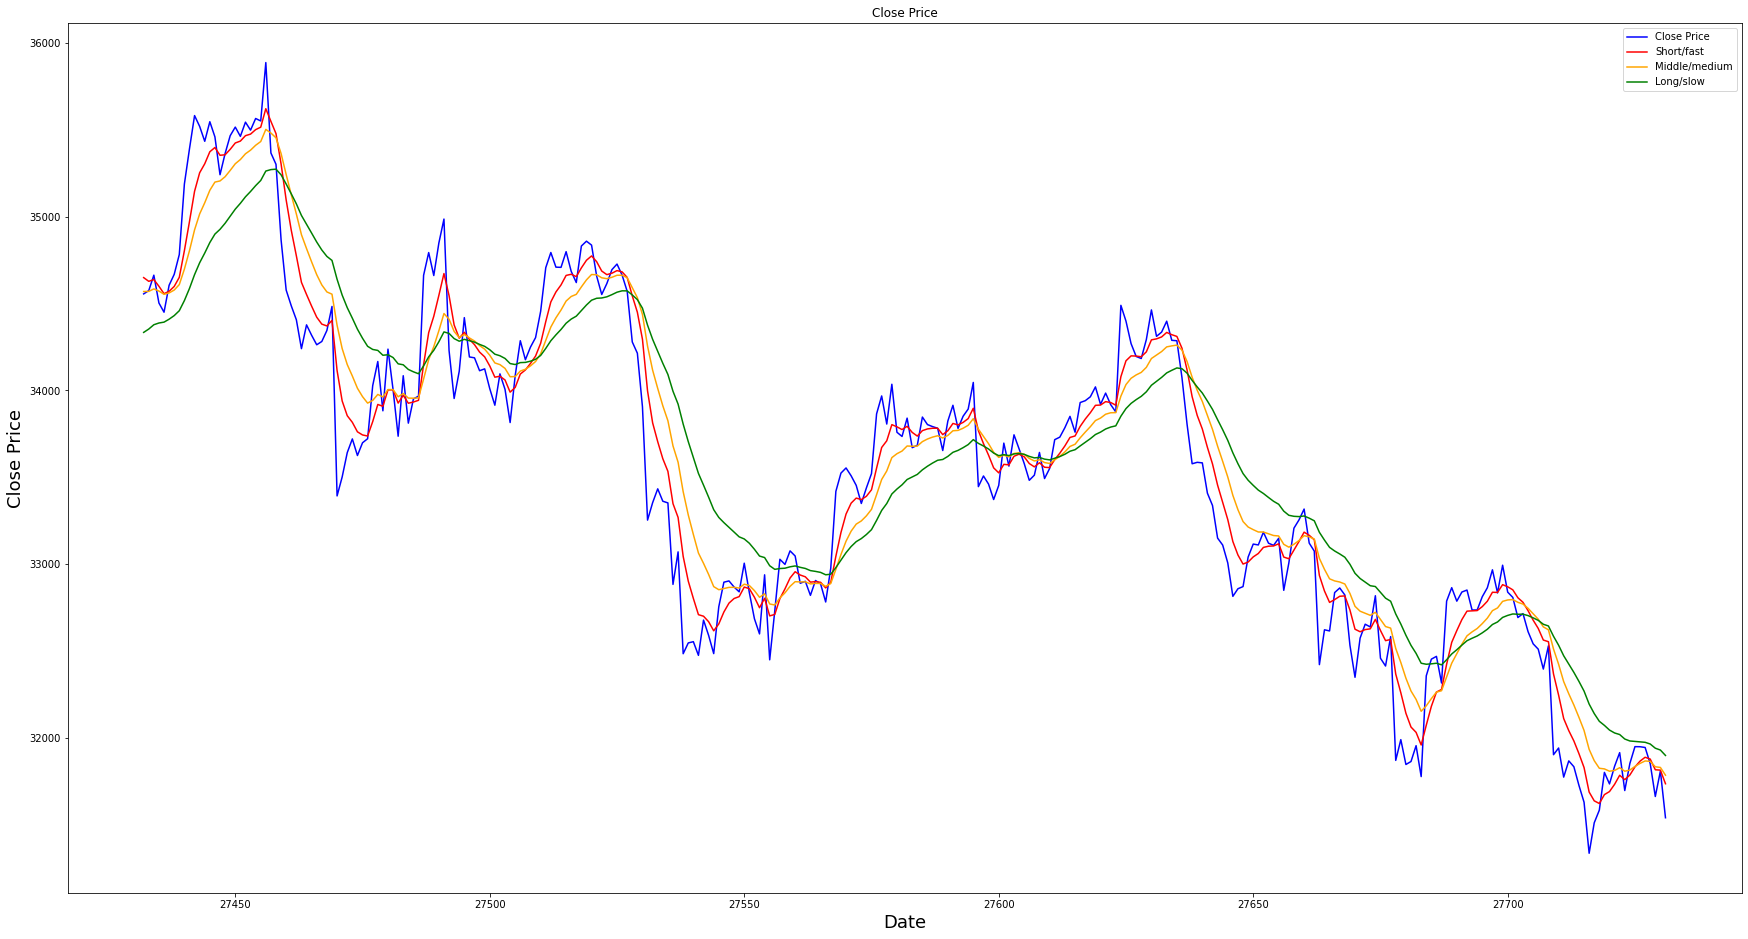

In [ ]:



fig, ax = plt.subplots(1, 1, figsize = (30, 16))
days = 300
ax.set_title('Close Price')
ax.plot(df['close'][-days:], label = 'Close Price', color = 'blue')
ax.plot(df['EMA_6'][-days:], label = 'Short/fast', color = 'red')
ax.plot(df['EMA_12'][-days:], label = 'Middle/medium', color = 'orange')
ax.plot(df['EMA_24'][-days:], label = 'Long/slow', color = 'green')
ax.set_xlabel('Date', fontsize = 18)
ax.set_ylabel('Close Price', fontsize = 18)
ax.legend()

plt.show()

# RSI

In [ ]:
## RSI (Relative Strenght Index)

df['RSI_21'] = df.ta.rsi(length=21)
df

# https://www.avatrade.es/educacion/professional-trading-strategies/rsi-trading-strategies
# mide el impulso de los cambios en el precio de un activo para evaluar si el precio de dicho activo está sobrevendido o sobrecomprado. su valor se sitúa entre 0 y 100.
# Una lectura del RSI por encima de 70 se considera indicativa de que un activo está sobre comprado o sobrevalorado. Por tanto, un RSI por encima de 70 estaría adelantando un posible movimiento correctivo del precio.
# Por el contrario, una lectura del RSI por debajo de 30 indica que un activo está sobrevendido o infravalorado, por lo que un RSI en este nivel podría anticipar una reacción alcista del precio.

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD,RSI_21
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396,45.899131
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134,44.232140
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.682377,8.427036e+08,5.944114e+11,2395.0,873.0,66.0,125.0,76.0,126.0,8606.0,3636.0,39044966.0,76.0,828.0,958.0,3715.0,175.0,664.0,1066.0,6358.0,343.0,1033115.0,4643675.0,2486288.0,22102141.0,8785324.0,39053189.0,3.7,3.0,89.0,NaN,11.0,1.8,4.1,2.7,61.5,0.015478,80.0,38.0,1.0,1464.0,2.0,1.0,1.0,NaN,NaN,8352.0,9632,1.0,37160.0,25.920344,-2.701550,1.438908e+12,41.309898,

# Bolinger Bands

In [ ]:
df['BBL_20_2.0'] = df.ta.bbands(length=20)['BBL_20_2.0']
df['BBM_20_2.0'] = df.ta.bbands(length=20)['BBM_20_2.0']
df['BBU_20_2.0'] = df.ta.bbands(length=20)['BBU_20_2.0']
df

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD,RSI_21,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396,45.899131,31358.217367,31814.957588,32271.697810
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134,44.232140,31461.228781,31781.049533,32100.870284
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.682377,8.427036e+08,5.944114e+11,2395.0,873.0,66.0,125.0,76.0,126.0,8606.0,3636.0,39044966.0,76.0,828.0,958.0,3715.0,175.0,664.0,1066.0,6358.0,343.0,1033115.0,4643675.0,2486288.0,22102

# Stochastic RSI

In [ ]:
## Stochastic RSI

df['STOCHRSIk_21_21_3_3'] = ta.stochrsi(df["close"], length=21, rsi_length=21)['STOCHRSIk_21_21_3_3']
df['STOCHRSId_21_21_3_3'] = ta.stochrsi(df["close"], length=21, rsi_length=21)['STOCHRSId_21_21_3_3']
df

# https://www.invertirenbolsa.mx/cursos/curso-cfd/estocastico/
# En el análisis del estocástico RSI debemos considerar los cruces, porque juegan un papel “crucial”.
# Si la línea verde revierte su tendencia y se cruza con la línea roja, existe una señal de compra
# Si la línea roja revierte su tendencia y se cruza con la línea verde, se trata de una señal de venta


,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD,RSI_21,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,STOCHRSIk_21_21_3_3,STOCHRSId_21_21_3_3
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396,45.899131,31358.217367,31814.957588,32271.697810,95.673567,87.282445
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134,44.232140,31461.228781,31781.049533,32100.870284,91.920788,92.588953
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.682377,8.427036e+08,5.944114e+11,2395.0,873.0,66.0,125.0

# Momentum

In [ ]:
df['MOM_21'] = df.ta.mom(length=21)
df

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD,RSI_21,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,STOCHRSIk_21_21_3_3,STOCHRSId_21_21_3_3,MOM_21
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396,45.899131,31358.217367,31814.957588,32271.697810,95.673567,87.282445,-566.109934
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134,44.232140,31461.228781,31781.049533,32100.870284,91.920788,92.588953,-544.477312
27729,0,1,1626415200,31855.514373,31661.640045,31855.514373,31608.6

In [ ]:
APIKey = 'your_api_key'
start_date = '2018-04-08'
end_date = '2021-10-09'

In [ ]:
data = {}
start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')
with tqdm(total=100) as pbar:
  while start_date_dt < end_date_dt:
    url = f'https://financialmodelingprep.com/api/v4/historical-price-full-forex/XAUUSD/1/hour/{start_date}/{end_date}?apikey={APIKey}'
    response = requests.get(url)
    res = json.loads(response.text)
    for result in res['results']:
      key = int(result['t']/1000)
      value =  result['c']
      data[key] = value
    start_date_dt = datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=3)
    start_date = start_date_dt.strftime('%Y-%m-%d')
    pbar.update(np.round(1/400*100, 2))

100%|██████████| 100.0/100 [04:16<00:00,  2.69s/it]/usr/local/lib/python3.7/dist-packages/tqdm/std.py:536: TqdmWarning: clamping frac to range [0, 1]
  colour=colour)
106.75it [04:33,  2.56s/it]


In [ ]:
gold_df = pd.DataFrame.from_dict(data, orient='index', columns=['gold']).reset_index().rename(columns={'index': 'time'})

In [ ]:
df = pd.merge(df, gold_df, how='left', on='time')
df

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD,RSI_21,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,STOCHRSIk_21_21_3_3,STOCHRSId_21_21_3_3,MOM_21,gold
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1332.07
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1332.14
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333.30
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335.16
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396,45.899131,31358.217367,31814.957588,32271.697810,95.673567,87.282445,-566.109934,1826.24
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134,44.232140,31461.228781,31781.049533,32100.870284,91.920788,92.588953,-544.477312,1824.53
27

In [ ]:
APIKey = 'your_api_key'
start_date = '2018-04-08'
end_date = '2021-10-09'

In [ ]:
url= f'https://financialmodelingprep.com/api/v4/historical-price-full-forex/EURUSD/1/hour/{start_date}/{end_date}?apikey={APIKey}'
response= requests.get(url)

res = json.loads(response.text)
res

{'results': [{'c': 1.22773,
   'formated': '2018-04-08 13:00:00',
   'h': 1.22838,
   'l': 1.22744,
   'o': 1.22838,
   't': 1523206800000,
   'v': 1147},
  {'c': 1.22741,
   'formated': '2018-04-08 14:00:00',
   'h': 1.22792,
   'l': 1.22719,
   'o': 1.22773,
   't': 1523210400000,
   'v': 2380},
  {'c': 1.22711,
   'formated': '2018-04-08 15:00:00',
   'h': 1.2277,
   'l': 1.22656,
   'o': 1.22741,
   't': 1523214000000,
   'v': 4262},
  {'c': 1.22748,
   'formated': '2018-04-08 16:00:00',
   'h': 1.22754,
   'l': 1.22657,
   'o': 1.22711,
   't': 1523217600000,
   'v': 6263},
  {'c': 1.22712,
   'formated': '2018-04-08 17:00:00',
   'h': 1.22773,
   'l': 1.22711,
   'o': 1.22749,
   't': 1523221200000,
   'v': 6193},
  {'c': 1.22737,
   'formated': '2018-04-08 18:00:00',
   'h': 1.22742,
   'l': 1.22658,
   'o': 1.22713,
   't': 1523224800000,
   'v': 3642},
  {'c': 1.22725,
   'formated': '2018-04-08 19:00:00',
   'h': 1.22754,
   'l': 1.22685,
   'o': 1.22738,
   't': 152322840000

In [ ]:
data = {}
start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')
with tqdm(total=100) as pbar:
  while start_date_dt < end_date_dt:
    url = f'https://financialmodelingprep.com/api/v4/historical-price-full-forex/EURUSD/1/hour/{start_date}/{end_date}?apikey=3875cdf76fc3c0f64586c8ddc50c954b'
    response = requests.get(url)
    res = json.loads(response.text)
    for result in res['results']:
      key = int(result['t']/1000)
      value =  result['c']
      data[key] = value
    start_date_dt = datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=3)
    start_date = start_date_dt.strftime('%Y-%m-%d')
    pbar.update(np.round(1/400*100, 2))

100%|██████████| 100.0/100 [04:10<00:00,  2.59s/it]/usr/local/lib/python3.7/dist-packages/tqdm/std.py:536: TqdmWarning: clamping frac to range [0, 1]
  colour=colour)
106.75it [04:27,  2.50s/it]


In [ ]:
EURUSD_df = pd.DataFrame.from_dict(data, orient='index', columns=['EURUSD']).reset_index().rename(columns={'index': 'time'})

In [ ]:
df = pd.merge(df, EURUSD_df, how='left', on='time')
df

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD,RSI_21,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,STOCHRSIk_21_21_3_3,STOCHRSId_21_21_3_3,MOM_21,gold_x,EURUSD
0,0,1,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1332.07,1.23236
1,0,1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1332.14,1.23113
2,0,1,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333.30,1.23188
3,0,1,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335.16,1.23182
4,0,1,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335.67,1.23174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,0,1,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396,45.899131,31358.217367,31814.957588,32271.697810,95.673567,87.282445,-566.109934,1826.24,1.18080
27728,0,1,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134,44.232140,31461.228781,31781.0

In [ ]:
df.drop(columns=['Unnamed: 0', 'asset_id'], inplace = True)
df

KeyError: ignored

In [ ]:
df

,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,percent_change_24h,market_cap_global,market_dominance,SO,EMA_6,EMA_12,EMA_24,MACD,RSI_21,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,STOCHRSIk_21_21_3_3,STOCHRSId_21_21_3_3,MOM_21,gold,EURUSD
0,1523264400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,30.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1332.07,1.23236
1,1523268000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,75.0,40.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1332.14,1.23113
2,1523271600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,40.0,59.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333.30,1.23188
3,1523275200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,63.0,77.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335.16,1.23182
4,1523278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,85.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335.67,1.23174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,1626408000,31955.771162,31943.856539,32040.245094,31898.221292,9.583896e+08,5.998500e+11,1449.0,760.0,40.0,169.0,89.0,266.0,7297.0,3560.0,33242607.0,70.0,1062.0,347.0,4290.0,200.0,677.0,968.0,5091.0,361.0,760302.0,3125325.0,2169036.0,19599582.0,7594131.0,33250260.0,3.6,3.0,86.0,NaN,11.0,3.3,4.1,2.8,69.0,0.015417,107.0,46.0,1.0,1529.0,2.0,1.0,1.0,NaN,NaN,7181.0,8197,1.0,34989.0,23.427363,-2.356416,1.449605e+12,41.380241,85.140804,31887.625972,31866.259551,31973.663948,-107.404396,45.899131,31358.217367,31814.957588,32271.697810,95.673567,87.282445,-566.109934,1826.24,1.18080
27728,1626411600,31963.102758,31850.888552,31982.958414,31788.240008,8.773209e+08,5.977096e+11,2029.0,744.0,53.0,166.0,54.0,96.0,7918.0,3049.0,28097459.0,237.0,1029.0,482.0,3573.0,201.0,630.0,865.0,5962.0,260.0,594042.0,3807854.0,1762111.0,18912798.0,3025975.0,28105071.0,3.7,3.0,88.0,NaN,15.0,2.8,4.1,2.7,66.5,0.015380,94.0,48.0,1.0,1489.0,2.0,1.0,1.0,NaN,NaN,7514.0,8784,1.0,37873.0,23.193304,-2.330319,1.449593e+12,41.232919,73.957123,31877.129566,31863.894782,31963.841916,-99.947134,44.232140,31461.228781,31781.049533,32100.870284,91.920788,92.588953,-544.477312,1824.53

In [ ]:
# Por defecto, el .csv con los datos se guardará en tu drive, en la carpeta raíz "drive/My Drive/"
# Pon COLAB = True si quieres guardar el .csv en la carpeta compartida de TFM. En este caso, se sobreescribirá lo anterior. Así que ojito :)
COLAB = True

file = 'DataFrameFull.csv'

df.to_csv(file)

if COLAB:
  !cp {file} "../drive/My Drive/TFM MBIT/Data"
else:
  !cp {file} "../drive/My Drive"